<a href="https://colab.research.google.com/github/Dhanalaxmi3103/Data_Science_Workshop/blob/main/Wine_Quality_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Wine Quality Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


In [ ]:
#Loading the dataset
wine=pd.read_csv("winequalityN.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Dataset Information
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine.shape

(6497, 13)

In [ ]:
wine['type'].value_counts()

,count
type,
white,4898
red,1599


In [ ]:
#Grouping according to type
wine.groupby('type').sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,13290.40,843.325,433.29,4059.55,139.859,25384.0,74302.0,1593.79794,5287.45,1050.95,16666.35,9012
white,33523.55,1360.930,1636.49,31301.35,224.131,172939.0,677690.5,4868.74609,15593.50,2398.23,51498.88,28790


In [ ]:
#checking for null values
wine.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


 **Filling missing values**

In [ ]:
#Filling "fixed acidity" with mean
wine['fixed acidity']=wine['fixed acidity'].fillna(wine['fixed acidity'].mean())

#Filling "Volatile acidity" with mean
wine['volatile acidity']=wine['volatile acidity'].fillna(wine['volatile acidity'].mean())

#Filling citric acid
wine['citric acid']=wine['citric acid'].fillna(wine['citric acid'].mean())

#Filling residual sugar
wine['residual sugar']=wine['residual sugar'].fillna(wine['residual sugar'].mean())

#Filling clorides
wine['chlorides']=wine['chlorides'].fillna(wine['chlorides'].mean())

#Filling pH
wine['pH']=wine['pH'].fillna(wine['pH'].mean())

#Filling sulphates
wine['sulphates']=wine['sulphates'].fillna(wine['sulphates'].mean())

In [ ]:
#Ckecking for null values
wine.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [ ]:
#Describing dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
wine['type']=label.fit_transform(wine['type'])

**Setting independent and dependent variables**

In [ ]:
X=wine.drop("quality",axis=1)
Y=wine['quality']

**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=35)

# **Random Forest Classifier**

In [ ]:
#Fitting model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

**Prediction**

In [ ]:
y_pred=rfc.predict(X_test)
y_pred

array([6, 6, 5, ..., 5, 6, 5])

**Evaluating the model performance**

In [ ]:
from sklearn import metrics
#Accuracy of Model
rfc_accu=metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)

0.68


<Axes: >

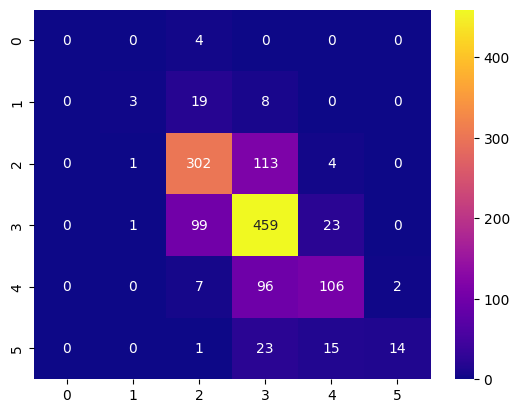

In [ ]:
#Confusion matrix
rfc_confu=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(rfc_confu,annot=True,fmt='d',cmap='plasma')

In [ ]:
#Classification report
rfc_class=metrics.classification_report(y_test,y_pred)
print(rfc_class)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.60      0.10      0.17        30
           5       0.70      0.72      0.71       420
           6       0.66      0.79      0.72       582
           7       0.72      0.50      0.59       211
           8       0.88      0.26      0.41        53

    accuracy                           0.68      1300
   macro avg       0.59      0.40      0.43      1300
weighted avg       0.69      0.68      0.67      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Random Forest Classifier using Hyperparameters**

In [ ]:
rfc1=RandomForestClassifier(n_estimators=88,max_depth=9,min_samples_split=2)
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=88)

In [ ]:
#Predicting
y_pred1=rfc1.predict(X_test)
y_pred1

array([6, 6, 5, ..., 6, 6, 5])

In [ ]:
#Accuracy
rfc1_accu=metrics.accuracy_score(y_test,y_pred1)
print(rfc1_accu)

0.6107692307692307


<Axes: >

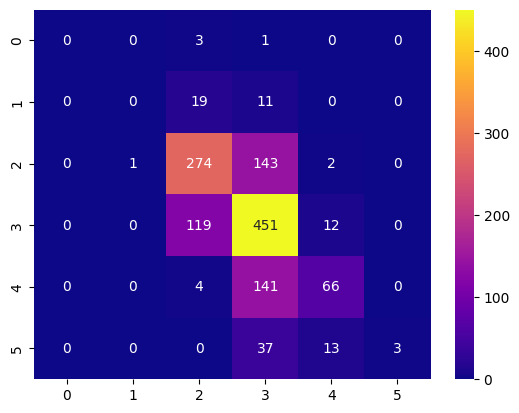

In [ ]:
#Confusion matrix
rfc1_confu=metrics.confusion_matrix(y_test,y_pred1)
sns.heatmap(rfc1_confu,annot=True,fmt='d',cmap='plasma')

#**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='entropy')
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#Prediction
dtree_pred=d_tree.predict(X_test)
dtree_pred

array([6, 6, 5, ..., 5, 5, 6])

**Evaluating the Model Performance**

In [ ]:
#Accuracy
dtree_accu=metrics.accuracy_score(y_test,dtree_pred)
print("Accuracy:\n",dtree_accu)

Accuracy:
 0.6176923076923077


<Axes: >

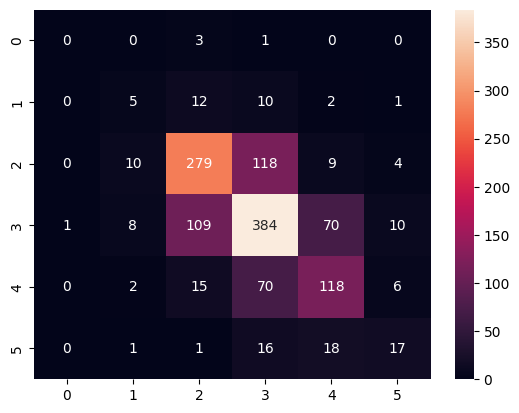

In [ ]:
#Confusion Matrix
dtree_confu=metrics.confusion_matrix(y_test,dtree_pred)
sns.heatmap(dtree_confu,annot=True,fmt='d')

In [ ]:
#Classification report
dtree_class=metrics.classification_report(y_test,dtree_pred)
print(dtree_class)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.19      0.17      0.18        30
           5       0.67      0.66      0.67       420
           6       0.64      0.66      0.65       582
           7       0.54      0.56      0.55       211
           8       0.45      0.32      0.37        53

    accuracy                           0.62      1300
   macro avg       0.42      0.40      0.40      1300
weighted avg       0.61      0.62      0.61      1300



# **Comparision of models performance**

In [ ]:
#Accuracy
print("Accuracy")
print("Decision Tree:",dtree_accu)
print("Random Forest:",rfc_accu)
print("Random Forest with Hyperparameters:",rfc1_accu)

Accuracy
Decision Tree: 0.6176923076923077
Random Forest: 0.68
Random Forest with Hyperparameters: 0.6107692307692307


In [ ]:
#F1 Score
print("F1 Score")
print("Decision Tree:",metrics.f1_score(y_test,dtree_pred,average='weighted'))
print("Random Forest:",metrics.f1_score(y_test,y_pred,average='weighted'))
print("Random Forest with Hyperparameters:",metrics.f1_score(y_test,y_pred1,average='weighted'))

F1 Score
Decision Tree: 0.6148539651821568
Random Forest: 0.6662119515957429
Random Forest with Hyperparameters: 0.5814854144610224


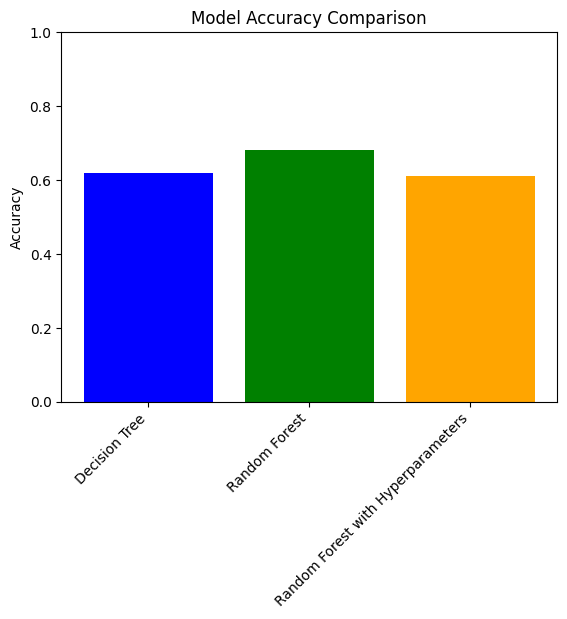

In [ ]:
models = ['Decision Tree', 'Random Forest', 'Random Forest with Hyperparameters']
accuracies = [dtree_accu, rfc_accu,rfc1_accu]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

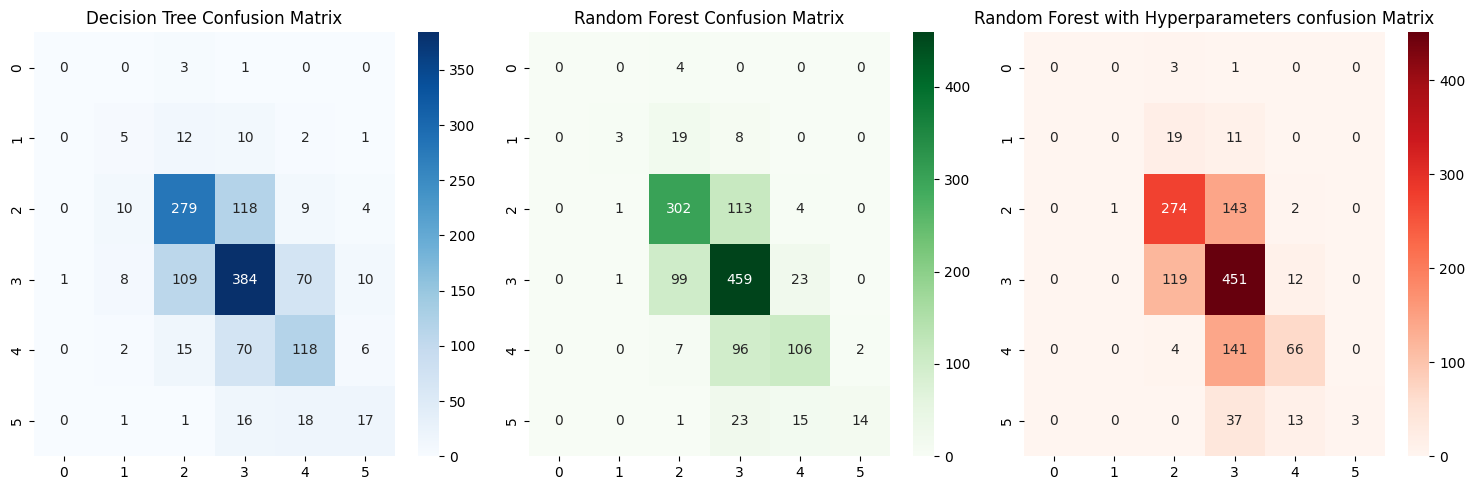

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for subplots

# Decision Tree Confusion Matrix
sns.heatmap(dtree_confu, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')

# Random Forest Confusion Matrix
sns.heatmap(rfc_confu, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')

sns.heatmap(rfc1_confu,annot=True,fmt='d',cmap='Reds',ax=axes[2])
axes[2].set_title("Random Forest with Hyperparameters confusion Matrix")
plt.show()

# **Feature importance**

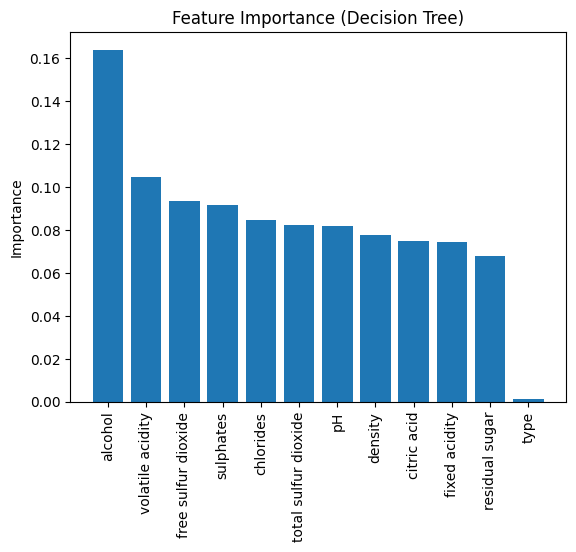

In [ ]:
# Get feature importances from the Decision Tree model
dtree_imp= d_tree.feature_importances_

# Get feature names from the dataset
feature_names = X.columns

# Sort feature importances in descending order
order = np.argsort(dtree_imp)[::-1]

# Create a bar plot of feature importances
plt.title("Feature Importance (Decision Tree)")
plt.bar(range(X.shape[1]), dtree_imp[order], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in order], rotation=90)
plt.ylabel("Importance")
plt.show()

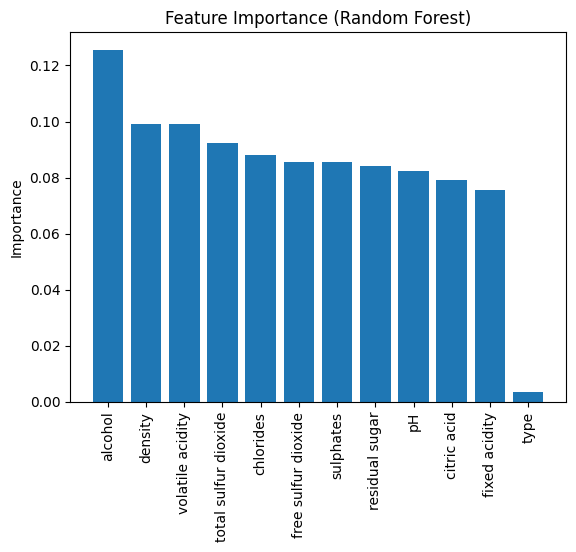

In [ ]:
# Get feature importances from the Random Forest model
rfc_imp= rfc.feature_importances_

# Get feature names from the dataset
feature_names = X.columns

# Sort feature importances in descending order
order= np.argsort(rfc_imp)[::-1]

# Create a bar plot of feature importances
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), rfc_imp[order], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in order], rotation=90)
plt.ylabel("Importance")
plt.show()